## Hand Written Digit Prediction - Classification

the digit data set consist of 88 pixel image of digit. the attribute of a data set stores 88 array of gray scale value of each image.we will use the array to visualize the first four image. the target attribute of data set store the digit each image represent

##Import Library

In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
import matplotlib.pyplot as plt

##Import Data

In [ ]:
from sklearn.datasets import load_digits

In [ ]:
df = load_digits()

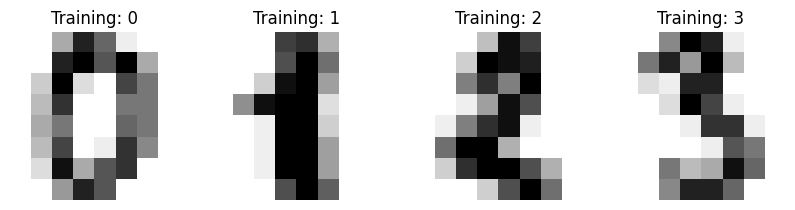

In [ ]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10,3))
for ax, image, label in zip(axes, df.images, df.target):
  ax.set_axis_off()
  ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
  ax.set_title("Training: %i" % label)

##Data *Preprocessing*

Flatten Image

In [ ]:
df.images.shape

(1797, 8, 8)

In [ ]:
df.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [ ]:
df.images[0].shape

(8, 8)

In [ ]:
len(df.images)

1797

In [ ]:
n_samples = len(df.images)
data = df.images.reshape((n_samples, -1))

In [ ]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [ ]:
data[0].shape

(64,)

In [ ]:
data.shape

(1797, 64)

## Scaling Image Data

In [ ]:
data.min()

0.0

In [ ]:
data.max()

16.0

In [ ]:
data = data/16

In [ ]:
data.min()

0.0

In [ ]:
data.max()

1.0

In [ ]:
data[0]

array([0.    , 0.    , 0.3125, 0.8125, 0.5625, 0.0625, 0.    , 0.    ,
       0.    , 0.    , 0.8125, 0.9375, 0.625 , 0.9375, 0.3125, 0.    ,
       0.    , 0.1875, 0.9375, 0.125 , 0.    , 0.6875, 0.5   , 0.    ,
       0.    , 0.25  , 0.75  , 0.    , 0.    , 0.5   , 0.5   , 0.    ,
       0.    , 0.3125, 0.5   , 0.    , 0.    , 0.5625, 0.5   , 0.    ,
       0.    , 0.25  , 0.6875, 0.    , 0.0625, 0.75  , 0.4375, 0.    ,
       0.    , 0.125 , 0.875 , 0.3125, 0.625 , 0.75  , 0.    , 0.    ,
       0.    , 0.    , 0.375 , 0.8125, 0.625 , 0.    , 0.    , 0.    ])

## Train Test Split Data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(data, df.target, test_size=0.3)

In [ ]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1257, 64), (540, 64), (1257,), (540,))

## Random Forest Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier()

In [ ]:
rf.fit(x_train, y_train)

RandomForestClassifier()

## Predict Test Data

In [ ]:
y_pred = rf.predict(x_test)

In [ ]:
y_pred

array([4, 2, 0, 4, 9, 4, 8, 9, 3, 1, 6, 0, 0, 9, 7, 5, 4, 3, 3, 6, 2, 6,
       7, 9, 2, 5, 7, 9, 3, 4, 0, 8, 2, 3, 6, 4, 9, 3, 5, 5, 8, 2, 0, 7,
       6, 7, 8, 4, 5, 0, 9, 9, 1, 6, 3, 3, 1, 5, 6, 4, 0, 9, 5, 0, 5, 6,
       2, 1, 1, 9, 0, 7, 6, 4, 6, 7, 9, 5, 9, 7, 2, 8, 1, 0, 5, 2, 5, 9,
       3, 3, 9, 1, 6, 9, 7, 3, 2, 8, 5, 7, 7, 2, 7, 6, 3, 5, 8, 1, 8, 1,
       4, 0, 6, 6, 8, 4, 2, 6, 1, 5, 7, 2, 6, 4, 1, 9, 9, 9, 7, 7, 8, 5,
       7, 4, 5, 4, 5, 7, 7, 0, 3, 2, 7, 6, 1, 0, 1, 4, 6, 3, 3, 0, 5, 4,
       9, 6, 3, 4, 0, 4, 5, 4, 9, 9, 8, 2, 9, 1, 9, 6, 9, 5, 6, 9, 6, 5,
       1, 7, 5, 0, 7, 5, 8, 3, 4, 0, 0, 7, 7, 8, 8, 9, 6, 4, 1, 1, 7, 0,
       6, 0, 8, 5, 0, 4, 2, 3, 6, 7, 0, 1, 4, 1, 7, 4, 5, 1, 4, 1, 6, 3,
       9, 0, 5, 8, 2, 0, 9, 2, 1, 1, 7, 7, 3, 9, 5, 1, 9, 5, 5, 8, 3, 0,
       5, 1, 8, 5, 2, 6, 0, 1, 0, 2, 0, 4, 8, 5, 1, 2, 3, 4, 9, 1, 6, 2,
       5, 2, 2, 8, 5, 6, 1, 4, 6, 4, 0, 3, 8, 3, 3, 1, 1, 2, 4, 3, 1, 7,
       4, 1, 8, 7, 9, 5, 2, 9, 3, 2, 5, 7, 8, 3, 2,

## Model Accuracy

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
confusion_matrix(y_test, y_pred)

array([[52,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 55,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0, 48,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1, 54,  0,  1,  0,  1,  2,  0],
       [ 0,  0,  0,  0, 50,  0,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0, 56,  0,  0,  0,  2],
       [ 0,  0,  0,  0,  0,  1, 52,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 57,  0,  1],
       [ 0,  4,  1,  0,  1,  0,  0,  1, 43,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  2,  2, 50]])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        52
           1       0.93      1.00      0.96        55
           2       0.96      0.98      0.97        49
           3       1.00      0.92      0.96        59
           4       0.98      0.98      0.98        51
           5       0.95      0.97      0.96        58
           6       1.00      0.98      0.99        53
           7       0.93      0.98      0.96        58
           8       0.91      0.86      0.89        50
           9       0.93      0.91      0.92        55

    accuracy                           0.96       540
   macro avg       0.96      0.96      0.96       540
weighted avg       0.96      0.96      0.96       540

